<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/DecTree_CreditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset
path = kagglehub.dataset_download("adilshamim8/credit-risk-benchmark-dataset")
print("Path to dataset files:", path)

# Replace with the correct filename from the dataset directory
data_path = f"{path}/Credit Risk Benchmark Dataset.csv"  # Adjust if filename is different
df = pd.read_csv(data_path)

100%|██████████| 309k/309k [00:00<00:00, 882kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adilshamim8/credit-risk-benchmark-dataset/versions/1


In [3]:
# Step 2: Inspect and preprocess
print(df.head())
print(df.info())

# Drop rows with missing values (for simplicity)
df.dropna(inplace=True)

# Identify target and features
target_column = "dlq_2yrs"  # Adjust if this is not the correct column name
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical variables to dummies if needed
X = pd.get_dummies(X, drop_first=True)

   rev_util   age  late_30_59  debt_ratio  monthly_inc  open_credit  late_90  \
0  0.006999  38.0         0.0    0.302150       5440.0          4.0      0.0   
1  0.704592  63.0         0.0    0.471441       8000.0          9.0      0.0   
2  0.063113  57.0         0.0    0.068586       5000.0         17.0      0.0   
3  0.368397  68.0         0.0    0.296273       6250.0         16.0      0.0   
4  1.000000  34.0         1.0    0.000000       3500.0          0.0      0.0   

   real_estate  late_60_89  dependents  dlq_2yrs  
0          1.0         0.0         3.0         0  
1          1.0         0.0         0.0         0  
2          0.0         0.0         0.0         0  
3          2.0         0.0         0.0         0  
4          0.0         0.0         1.0         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev_util     16

In [4]:
# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Step 4: Train a decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [6]:
# Step 5: Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7545363908275174
              precision    recall  f1-score   support

           0       0.78      0.71      0.75      2530
           1       0.73      0.80      0.76      2485

    accuracy                           0.75      5015
   macro avg       0.76      0.75      0.75      5015
weighted avg       0.76      0.75      0.75      5015



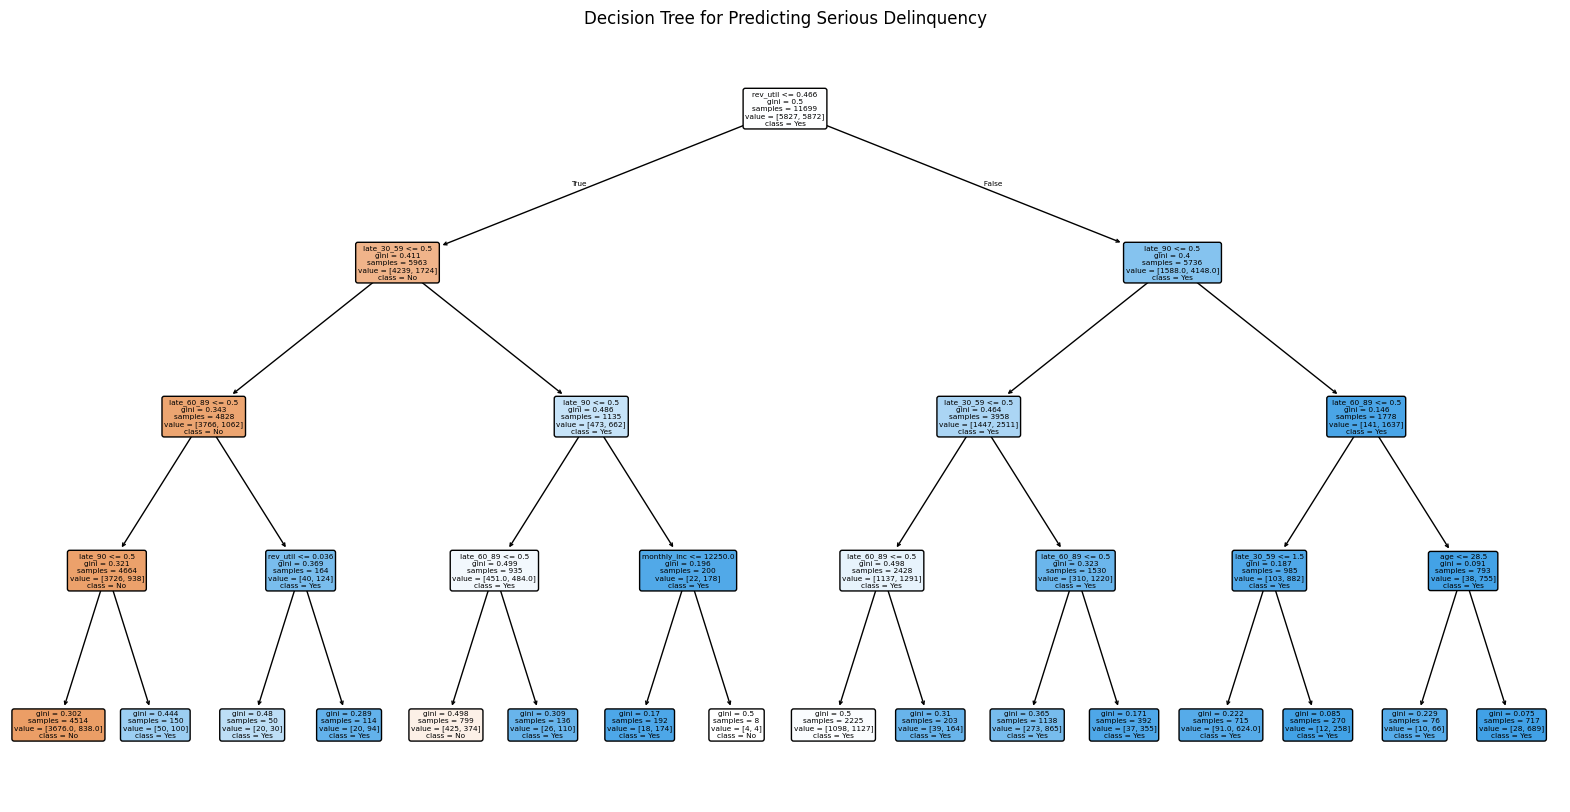

In [7]:
# Step 6: Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree for Predicting Serious Delinquency")
plt.show()